In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
np.__version__,pd.__version__,sklearn.__version__

('1.24.3', '1.5.3', '1.3.0')

# load data

In [3]:
df = pd.read_csv('datasets/disease/dataset.csv') # datapath 

In [4]:
df.head(4) # see data sample

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [6]:
symptoms = df.loc[:, df.columns != 'Disease']
symptoms[:5]

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


count feature

In [7]:
symptoms_numpy = symptoms.values.flatten()

In [8]:
features = set(symptoms_numpy)
features.remove(np.nan)
features,len(features)

({' abdominal_pain',
  ' abnormal_menstruation',
  ' acidity',
  ' acute_liver_failure',
  ' altered_sensorium',
  ' anxiety',
  ' back_pain',
  ' belly_pain',
  ' blackheads',
  ' bladder_discomfort',
  ' blister',
  ' blood_in_sputum',
  ' bloody_stool',
  ' blurred_and_distorted_vision',
  ' breathlessness',
  ' brittle_nails',
  ' bruising',
  ' burning_micturition',
  ' chest_pain',
  ' chills',
  ' cold_hands_and_feets',
  ' coma',
  ' congestion',
  ' constipation',
  ' continuous_feel_of_urine',
  ' continuous_sneezing',
  ' cough',
  ' cramps',
  ' dark_urine',
  ' dehydration',
  ' depression',
  ' diarrhoea',
  ' dischromic _patches',
  ' distention_of_abdomen',
  ' dizziness',
  ' drying_and_tingling_lips',
  ' enlarged_thyroid',
  ' excessive_hunger',
  ' extra_marital_contacts',
  ' family_history',
  ' fast_heart_rate',
  ' fatigue',
  ' fluid_overload',
  ' foul_smell_of urine',
  ' headache',
  ' high_fever',
  ' hip_joint_pain',
  ' history_of_alcohol_consumption',
  

actually you can load from Symptom-serverity

In [2]:
df_serverity = pd.read_csv("datasets/disease/Symptom-severity.csv")

In [3]:
df_serverity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [4]:
# see all the symptom
features = list(df_serverity["Symptom"].unique())
# features = [feature.replace('_', ' ') for feature in features]


In [5]:
features[:5]

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering']

In [13]:
df_serverity["Symptom"].info
# a bit weird because in datasets there are only 131

<bound method Series.info of 0                   itching
1                 skin_rash
2      nodal_skin_eruptions
3       continuous_sneezing
4                 shivering
               ...         
128      inflammatory_nails
129                 blister
130    red_sore_around_nose
131       yellow_crust_ooze
132               prognosis
Name: Symptom, Length: 133, dtype: object>

In [60]:
arr

NameError: name 'arr' is not defined

### grouping test

group it together

In [14]:

import spacy
nlp = spacy.load('en_core_web_sm')

import re

def remove_hyperlinks(sentence):
    
    #just in case there is hyperlink....
    sentence = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        sentence
    )
    
    return sentence

def preprocessing(sentence):
    
    sentence = remove_hyperlinks(sentence)
    
    doc = nlp(sentence)
    cleaned_tokens = []
    for token in doc:
        # print(token.text, token.lemma_, token.pos_, token.is_stop)
        if token.is_stop == False and \
            token.pos_ != 'SYM' and \
            token.pos_ != 'PUNCT' and token.pos_ != 'SPACE':
            cleaned_tokens.append(token.lemma_.lower().strip())
            
    #instead of returning tokens, we shall join them
    return " ".join(cleaned_tokens)

def preprocessing_list(sentence):
    
    sentence = remove_hyperlinks(sentence)
    
    doc = nlp(sentence)
    cleaned_tokens = []
    for token in doc:
        # print(token.text, token.lemma_, token.pos_, token.is_stop)
        if token.is_stop == False and \
            token.pos_ != 'SYM' and \
            token.pos_ != 'PUNCT' and token.pos_ != 'SPACE':
            cleaned_tokens.append(token.lemma_.lower().strip())

    return cleaned_tokens

In [ ]:
# see same words
feature_copy = features.copy()
groups = []
while len(feature_copy):
    feature1 = feature_copy[0]
    feature_copy.remove(feature1)
    groups.append([])
    groups[-1].append(feature1)
    feature1_token = preprocessing_list(feature1)
    for feature2 in feature_copy:
        feature2_token = preprocessing_list(feature2)
        for ft in feature1_token:
            if ft in feature2_token:
                groups[-1].append(feature2)
                feature_copy.remove(feature2)
                break

In [ ]:
preprocessing_list('skin_rash')[0] in preprocessing_list("nodal_skin_eruptions") 

True

In [ ]:
groups

[['itching'],
 ['skin_rash', 'nodal_skin_eruptions', 'yellowish_skin', 'skin_peeling'],
 ['continuous_sneezing', 'continuous_feel_of_urine'],
 ['shivering'],
 ['chills'],
 ['joint_pain',
  'stomach_pain',
  'pain_behind_the_eyes',
  'abdominal_pain',
  'chest_pain',
  'pain_during_bowel_movements',
  'neck_pain',
  'knee_pain',
  'swelling_joints',
  'muscle_pain',
  'belly_pain'],
 ['acidity'],
 ['ulcers_on_tongue'],
 ['muscle_wasting', 'muscle_weakness'],
 ['vomiting'],
 ['burning_micturition'],
 ['spotting_urination', 'red_spots_over_body'],
 ['fatigue'],
 ['weight_gain', 'weight_loss'],
 ['anxiety'],
 ['cold_hands_and_feets'],
 ['mood_swings'],
 ['restlessness'],
 ['lethargy'],
 ['patches_in_throat', 'throat_irritation', 'dischromic_patches'],
 ['irregular_sugar_level'],
 ['cough'],
 ['high_fever', 'mild_fever'],
 ['sunken_eyes',
  'yellowing_of_eyes',
  'redness_of_eyes',
  'puffy_face_and_eyes',
  'watering_from_eyes'],
 ['breathlessness'],
 ['sweating'],
 ['dehydration'],
 ['ind

try sentence similarity

In [ ]:
preprocessing("loss_of_smell")

'loss smell'

In [ ]:
feature_copy = features.copy()
groups = []
while len(feature_copy):
    feature1 = feature_copy[0]
    feature_copy.remove(feature1)
    groups.append([])
    groups[-1].append(feature1)
    for feature2 in feature_copy[1:]:
        similarity = nlp(preprocessing(feature1)).similarity(nlp(preprocessing(feature2)))
        if similarity > 0.5:
            groups[-1].append(feature2)
            feature_copy.remove(feature2)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_31304\276967784.py:9: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = nlp(preprocessing(feature1)).similarity(nlp(preprocessing(feature2)))


In [ ]:
groups

[['itching',
  'ulcers_on_tongue',
  'lethargy',
  'cough',
  'headache',
  'nausea',
  'diarrhoea',
  'mild_fever',
  'phlegm',
  'dizziness',
  'cramps',
  'bruising',
  'swollen_extremeties',
  'stomach_bleeding'],
 ['skin_rash',
  'stomach_pain',
  'patches_in_throat',
  'yellowish_skin',
  'dark_urine',
  'pain_behind_the_eyes',
  'abdominal_pain',
  'yellow_urine',
  'yellowing_of_eyes',
  'swelling_of_stomach',
  'throat_irritation',
  'redness_of_eyes',
  'runny_nose',
  'chest_pain',
  'irritation_in_anus',
  'neck_pain',
  'swollen_blood_vessels',
  'puffy_face_and_eyes',
  'drying_and_tingling_lips',
  'weakness_of_one_body_side',
  'bladder_discomfort',
  'muscle_pain',
  'red_spots_over_body',
  'belly_pain',
  'mucoid_sputum',
  'rusty_sputum',
  'pus_filled_pimples',
  'skin_peeling',
  'inflammatory_nails',
  'red_sore_around_nose',
  'yellow_crust_ooze'],
 ['nodal_skin_eruptions',
  'muscle_wasting',
  'spotting_urination',
  'irregular_sugar_level',
  'dehydration',
 

In [ ]:
similarity = nlp('fever').similarity(nlp("fever"))

In [ ]:
similarity

1.0

### prepare data

#### onehot

In [6]:
df_preprocess = pd.DataFrame()
df_preprocess['Disease'] = df["Disease"]

In [7]:
df_preprocess['symptoms_text'] = df.drop('Disease', axis=1).apply(lambda x: ' '.join(x.dropna().str.replace(' ','')), axis=1)
df_preprocess['symptoms_text']

0       itching skin_rash nodal_skin_eruptions dischro...
1       skin_rash nodal_skin_eruptions dischromic_patches
2         itching nodal_skin_eruptions dischromic_patches
3                    itching skin_rash dischromic_patches
4                  itching skin_rash nodal_skin_eruptions
                              ...                        
4915    vomiting headache nausea spinning_movements lo...
4916     skin_rash pus_filled_pimples blackheads scurring
4917    burning_micturition bladder_discomfort foul_sm...
4918    skin_rash joint_pain skin_peeling silver_like_...
4919    skin_rash high_fever blister red_sore_around_n...
Name: symptoms_text, Length: 4920, dtype: object

In [8]:
# onehot
df_onehot = pd.concat([df["Disease"],df_preprocess['symptoms_text'].str.get_dummies(sep=' ')],axis=1)
df_onehot.head()

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_onehot.to_csv('datasets/disease/dataset_onehot.csv', index=False)

#### text

In [64]:
# text
df_preprocess['symptoms_count'] = df_preprocess['symptoms_text'].apply(lambda x: len(x.split()))
df_preprocess.head()

,Disease,symptoms_text,symptoms_count
0,Fungal infection,itching skin_rash nodal_skin_eruptions dischro...,4
1,Fungal infection,skin_rash nodal_skin_eruptions dischromic_patches,3
2,Fungal infection,itching nodal_skin_eruptions dischromic_patches,3
3,Fungal infection,itching skin_rash dischromic_patches,3
4,Fungal infection,itching skin_rash nodal_skin_eruptions,3


In [89]:
df_preprocess.to_csv('datasets/disease/dataset_text.csv', index=False)

In [65]:
df_preprocess.describe()

,symptoms_count
count,4920.000000
mean,7.448780
std,3.592166
min,3.000000
25%,5.000000
50%,6.000000
75%,10.000000
max,17.000000


In [66]:
arr

NameError: name 'arr' is not defined

# EDA

note: for classification problem you should always use hua = 'y' which 'y' is label name

In [67]:
import seaborn as sns

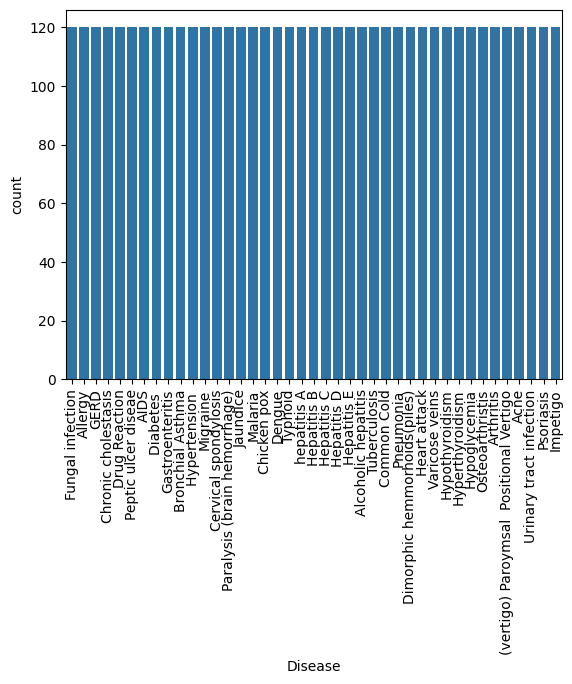

In [68]:
disease_count = sns.countplot(data=df, x="Disease") # see the number of each class
plt.xticks(rotation=90)  # This rotates the x-labels by 90 degrees
plt.show()

* data balanced

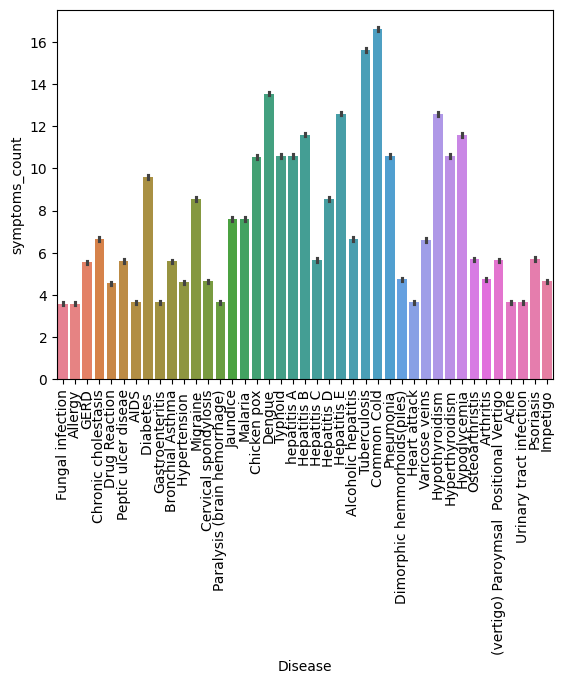

In [69]:
# how many symptoms for each class

sns.barplot(data = df_preprocess ,x = 'Disease', y = "symptoms_count", hue="Disease")
# plt.title("Label Distribution")
plt.xticks(rotation=90)  # Rotate x-labels for readability
plt.show()

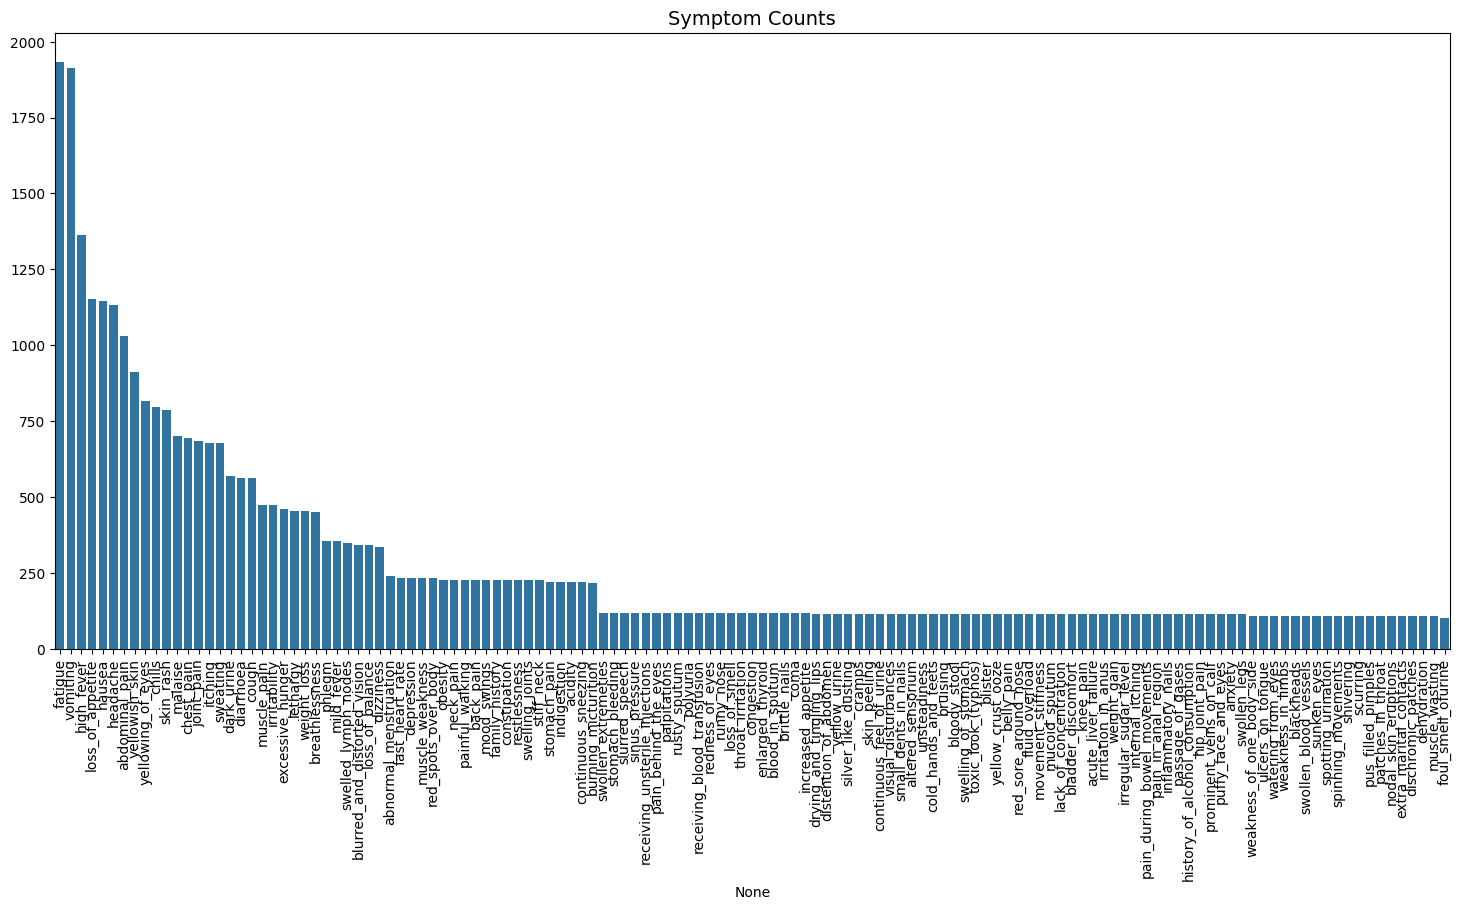

In [87]:
# Assuming your data is in a DataFrame named 'data' and the symptoms are columns except 'Disease'
symptoms_data = df_onehot.drop('Disease', axis=1)

# Calculate the total count of each symptom
symptom_counts = symptoms_data.sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x=symptom_counts.index, y=symptom_counts.values)
plt.xticks(rotation=90)
plt.title('Symptom Counts', fontsize=14)
plt.show()




In [ ]:
sns.scatterplot(data=df, x="continuous_data", y="continuous_data",hue='y') # see the relation between feature

In [ ]:
sns.histplot(data=df, x="continuous_data") # see the distribution 

In [ ]:
sns.boxplot(data=df, x="catagory_data or y", y="continuous_data") # see the distibution over catagory data

easy for any task

In [17]:
df_onehot.corr()

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
Disease,1.000000,0.154424,0.095695,0.058592,0.026033,0.156199,0.065083,-0.202974,0.221282,-0.227907,...,0.147986,-0.202584,-0.164599,0.151938,0.078099,0.135060,0.091116,-0.013017,0.152406,0.010079
abdominal_pain,0.154424,1.000000,-0.116670,-0.111995,0.298940,-0.079348,-0.079348,-0.113570,0.279030,-0.077184,...,0.479768,-0.077184,-0.077184,-0.077184,-0.079348,0.021263,-0.079348,0.279030,0.527264,0.733180
abnormal_menstruation,0.095695,-0.116670,1.000000,-0.049227,-0.034877,-0.034877,-0.034877,-0.049920,-0.034877,-0.033926,...,-0.180700,-0.033926,-0.033926,-0.033926,0.680108,0.298557,-0.034877,-0.034877,-0.100977,-0.108023
acidity,0.058592,-0.111995,-0.049227,1.000000,-0.033480,-0.033480,-0.033480,-0.047919,-0.033480,-0.032566,...,0.019355,-0.032566,-0.032566,-0.032566,-0.033480,-0.069477,-0.033480,-0.033480,-0.096931,-0.103694
acute_liver_failure,0.026033,0.298940,-0.034877,-0.033480,1.000000,-0.023720,-0.023720,-0.033951,-0.023720,-0.023073,...,0.176385,-0.023073,-0.023073,-0.023073,-0.023720,-0.049224,-0.023720,-0.023720,0.345397,0.302010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
weight_loss,0.135060,0.021263,0.298557,-0.069477,-0.049224,-0.049224,-0.049224,-0.070455,-0.049224,-0.047882,...,0.055501,-0.047882,-0.047882,-0.047882,-0.049224,1.000000,-0.049224,-0.049224,0.072306,0.042338
yellow_crust_ooze,0.091116,-0.079348,-0.034877,-0.033480,-0.023720,-0.023720,-0.023720,-0.033951,-0.023720,-0.023073,...,-0.122896,-0.023073,-0.023073,-0.023073,-0.023720,-0.049224,1.000000,-0.023720,-0.068676,-0.073467
yellow_urine,-0.013017,0.279030,-0.034877,-0.033480,-0.023720,-0.023720,-0.023720,-0.033951,-0.023720,-0.023073,...,-0.122896,-0.023073,-0.023073,-0.023073,-0.023720,-0.049224,-0.023720,1.000000,0.345397,0.302010
yellowing_of_eyes,0.152406,0.527264,-0.100977,-0.096931,0.345397,-0.068676,-0.068676,-0.098295,-0.068676,-0.066802,...,0.269629,-0.066802,-0.066802,-0.066802,-0.068676,0.072306,-0.068676,0.345397,1.000000,0.715405


In [12]:
df_onehot.corr().to_csv("datasets/disease/pearson_correlation.csv")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29228\445663918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_onehot.corr().to_csv("datasets/disease/pearson_correlation.csv")


<Axes: >

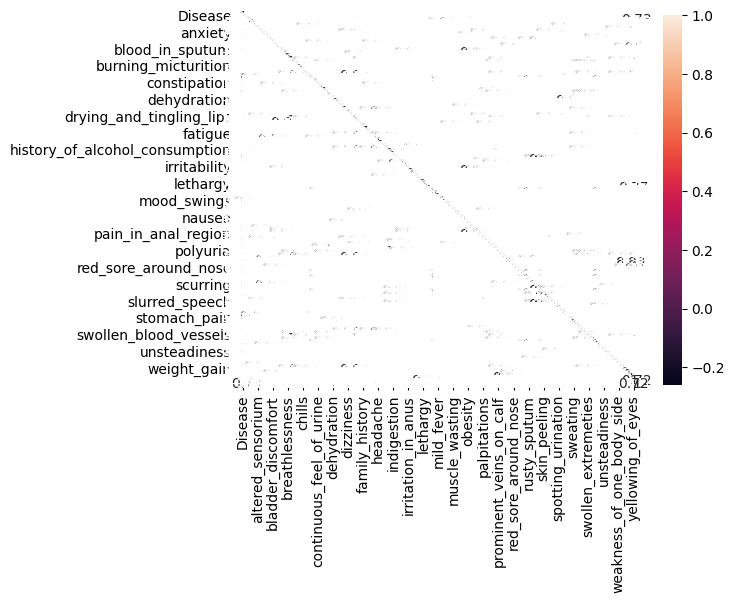

In [16]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_onehot["Disease"] = label_encoder.fit_transform(df["Disease"])

 # see the correation

In [24]:
correlation_matrix = df_onehot.corr()
# Set a threshold for correlation strength
threshold = 0.8  # You can adjust this threshold as per your preference
 # You can adjust this threshold as per your preference

# Find highly correlated features
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((feature1, feature2, correlation))

# Convert to a DataFrame for easy visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

high_corr_df

,Feature 1,Feature 2,Correlation
0,cold_hands_and_feets,brittle_nails,0.974071
1,coma,acute_liver_failure,0.974071
2,continuous_feel_of_urine,bladder_discomfort,0.946120
3,cramps,bruising,0.946120
4,drying_and_tingling_lips,anxiety,0.946120
...,...,...,...
91,weight_gain,swollen_extremeties,0.974071
92,yellow_crust_ooze,blister,0.946120
93,yellow_crust_ooze,red_sore_around_nose,0.946120
94,yellow_urine,receiving_blood_transfusion,0.974071


In [25]:
high_corr_df.to_csv("datasets/disease/high_corr.csv")

In [1]:
import pandas as pd 

df_onehot = pd.read_csv("datasets/disease/dataset_onehot.csv")

some test on other correlation

In [10]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(df_onehot["runny_nose"], df_onehot["loss_of_smell"])
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: 1.0


In [2]:
from phik import phik_matrix
phi_matrix = df_onehot.phik_matrix()

interval columns not set, guessing: ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_ofurine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', 'irrita

In [13]:
phi_matrix.to_csv("datasets/disease/phi_correlation.csv")

In [ ]:
# import pandas as pd
# import numpy as np
# from scipy.stats import chi2_contingency

# # Assuming you have your data loaded into a DataFrame called 'data'
# # The 'disease' column is your target and the rest are symptoms/features

# # For demonstration, let's say your data looks like this:
# # disease | symptom_1 | symptom_2 | ... | symptom_131
# # ----------------------------------------------------
# #    A    |    1      |     0     | ... |     1
# #    B    |    0      |     1     | ... |     0
# #   ...   |   ...     |    ...    | ... |    ...
# #    C    |    1      |     1     | ... |     0

# # Replace this with your dataset
# # Create a DataFrame with your data
# # Assuming 'data' is your DataFrame with disease and symptom columns
# # Replace this with your actual dataset
# # Example:
# # data = pd.read_csv('your_dataset.csv')

# # Create a contingency table between disease and each symptom
# contingency_table = pd.crosstab(data['disease'], data['symptom_1'])  # Replace 'symptom_1' with the actual symptom column

# # Calculate Cramér's V
# def cramers_v(confusion_matrix):
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
#     rcorr = r - ((r - 1) ** 2) / (n - 1)
#     kcorr = k - ((k - 1) ** 2) / (n - 1)
#     return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# cramer_v = cramers_v(contingency_table)

# print(f"Cramer's V value: {cramer_v}")


pps

In [ ]:
import ppscore as pps

# before using pps, let's drop country and year
# dfcopy = df.copy()
# dfcopy.drop(['catagory_data1','catagory_data2'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(df_onehot)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')



In [6]:
matrix_df.to_csv("datasets/disease/pps_score.csv")

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize = (15,8))
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)


have you ever try this?

In [ ]:
import sweetviz
# report = sweetviz.analyze([df,'train'],target_feat='Disease')
report = sweetviz.analyze(df_onehot,target_feat='Disease')
report.show_html('report.html')

In [ ]:
report.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# data engineering

## group by words

### text processing

In [6]:

import spacy
nlp = spacy.load('en_core_web_sm')

import re

def remove_hyperlinks(sentence):
    
    #just in case there is hyperlink....
    sentence = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        sentence
    )
    
    return sentence

def preprocessing(sentence):
    
    sentence = remove_hyperlinks(sentence)
    
    doc = nlp(sentence)
    cleaned_tokens = []
    for token in doc:
        # print(token.text, token.lemma_, token.pos_, token.is_stop)
        if token.is_stop == False and \
            token.pos_ != 'SYM' and \
            token.pos_ != 'PUNCT' and token.pos_ != 'SPACE':
            cleaned_tokens.append(token.lemma_.lower().strip())
            
    #instead of returning tokens, we shall join them
    return " ".join(cleaned_tokens)

def preprocessing_list(sentence):
    
    sentence = remove_hyperlinks(sentence)
    
    doc = nlp(sentence)
    cleaned_tokens = []
    for token in doc:
        # print(token.text, token.lemma_, token.pos_, token.is_stop)
        if token.is_stop == False and \
            token.pos_ != 'SYM' and \
            token.pos_ != 'PUNCT' and token.pos_ != 'SPACE':
            cleaned_tokens.append(token.lemma_.lower().strip())

    return cleaned_tokens

### see possible group

In [7]:
features[:5],len(features)

(['itching',
  'skin_rash',
  'nodal_skin_eruptions',
  'continuous_sneezing',
  'shivering'],
 132)

In [8]:
all_words = []
word_symptoms = []
for ft in features:
    list_words=preprocessing_list(ft)
    all_words+=list_words
    word_symptoms +=[(list_words,ft)]



In [9]:
set_words = set(all_words)

len(all_words) , len(set_words)

(255, 194)

In [43]:
symptom_groups ={}
for word in set_words:
    symptom_groups[word] = []
    for lw,sym in word_symptoms:
        for w in lw:
            if " "+word in " "+w or word+" " in w+" ":
                symptom_groups[word].append(sym)
            

In [44]:
filtered_group= {}
for k,v in symptom_groups.items():
    if len(v) > 1:
        filtered_group[k] = v

In [45]:
filtered_group

{'joint': ['joint_pain', 'hip_joint_pain', 'swelling_joints'],
 'sputum': ['mucoid_sputum', 'rusty_sputum', 'blood_in_sputum'],
 'receive': ['receiving_blood_transfusion', 'receiving_unsterile_injections'],
 'movement': ['pain_during_bowel_movements',
  'movement_stiffness',
  'spinning_movements'],
 'throat': ['patches_in_throat', 'throat_irritation'],
 'stiff': ['stiff_neck', 'movement_stiffness'],
 'skin': ['skin_rash',
  'nodal_skin_eruptions',
  'yellowish_skin',
  'skin_peeling'],
 'irritation': ['throat_irritation', 'irritation_in_anus'],
 'spot': ['spotting_urination', 'red_spots_over_body'],
 'smell': ['loss_of_smell', 'foul_smell_ofurine'],
 'itch': ['itching', 'internal_itching'],
 'pain': ['joint_pain',
  'stomach_pain',
  'pain_behind_the_eyes',
  'back_pain',
  'abdominal_pain',
  'chest_pain',
  'pain_during_bowel_movements',
  'pain_in_anal_region',
  'neck_pain',
  'knee_pain',
  'hip_joint_pain',
  'muscle_pain',
  'belly_pain',
  'painful_walking'],
 'continuous': ['

In [46]:
len(filtered_group) # we have 33 new feature

33

In [48]:
new_feature_list = [k for k,v in filtered_group.items()]


manualy check


organ or body part: joint, throat, skin, eye, body, nose, stomach, muscle, neck, nail


other: 'sputum' 'receive','movement','stiff','irritation','spot','itch','pain','continuous','yellow','urine','history',
'fever','weakness','patch','swollen','appetite','red','weight','loss','swell','blood'


removed : smell -> 'loss_of_smell', 'foul_smell_ofurine' not related in group

In [62]:
filtered_group['stiff']

['stiff_neck', 'movement_stiffness']

In [63]:
filtered_group.pop('smell')

['loss_of_smell', 'foul_smell_ofurine']

In [64]:
len(filtered_group)

32

In [73]:
filtered_group

{'joint': ['joint_pain', 'hip_joint_pain', 'swelling_joints'],
 'sputum': ['mucoid_sputum', 'rusty_sputum', 'blood_in_sputum'],
 'receive': ['receiving_blood_transfusion', 'receiving_unsterile_injections'],
 'movement': ['pain_during_bowel_movements',
  'movement_stiffness',
  'spinning_movements'],
 'throat': ['patches_in_throat', 'throat_irritation'],
 'stiff': ['stiff_neck', 'movement_stiffness'],
 'skin': ['skin_rash',
  'nodal_skin_eruptions',
  'yellowish_skin',
  'skin_peeling'],
 'irritation': ['throat_irritation', 'irritation_in_anus'],
 'spot': ['spotting_urination', 'red_spots_over_body'],
 'itch': ['itching', 'internal_itching'],
 'pain': ['joint_pain',
  'stomach_pain',
  'pain_behind_the_eyes',
  'back_pain',
  'abdominal_pain',
  'chest_pain',
  'pain_during_bowel_movements',
  'pain_in_anal_region',
  'neck_pain',
  'knee_pain',
  'hip_joint_pain',
  'muscle_pain',
  'belly_pain',
  'painful_walking'],
 'continuous': ['continuous_sneezing', 'continuous_feel_of_urine'],


In [93]:
import pickle 

with open('datasets/disease/group_feature.pkl', 'wb') as f:
    pickle.dump(filtered_group, f)

In [95]:
with open('datasets/disease/group_feature.pkl', 'rb') as f:
    hi = pickle.load(f)

In [97]:
len(hi)

32

### add feature to datasets

text data

In [67]:
# add feature to datasets

dataset_text = pd.read_csv("datasets/disease/dataset_text.csv")


In [74]:
def match_words(text):
    matched_keys = [key for key, words in filtered_group.items() if any(word in text for word in words)]
    return f"{text} {' '.join(matched_keys)}" if matched_keys else text

In [78]:
dataset_text['symptoms_text'].iloc[0]

'itching skin_rash nodal_skin_eruptions dischromic_patches'

In [79]:
dataset_text['symptoms_text'].apply(match_words).iloc[0]

'itching skin_rash nodal_skin_eruptions dischromic_patches skin itch patch'

In [88]:
dataset_text['symptoms_text'] = dataset_text['symptoms_text'].apply(match_words)

In [89]:
dataset_text.to_csv('datasets/disease/dataset_text_new_feature.csv', index=False)

one hot data

In [80]:

dataset_onehot = pd.read_csv("datasets/disease/dataset_onehot.csv")

In [81]:
for key, symptoms in filtered_group.items():
    dataset_onehot[key] = dataset_onehot.apply(lambda row: 1 if any(row[symptom] == 1 for symptom in symptoms) else 0, axis=1)

In [84]:
dataset_onehot.columns

Index(['Disease', 'abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain',
       'belly_pain', 'blackheads',
       ...
       'appetite', 'red', 'weight', 'stomach', 'loss', 'swell', 'muscle',
       'neck', 'nail', 'blood'],
      dtype='object', length=164)

In [85]:
dataset_onehot.iloc[0]

Disease                  Fungal infection
abdominal_pain                          0
abnormal_menstruation                   0
acidity                                 0
acute_liver_failure                     0
                               ...       
swell                                   0
muscle                                  0
neck                                    0
nail                                    0
blood                                   0
Name: 0, Length: 164, dtype: object

In [86]:
dataset_onehot.to_csv('datasets/disease/dataset_onehot_new_feature.csv', index=False)

### EDA again

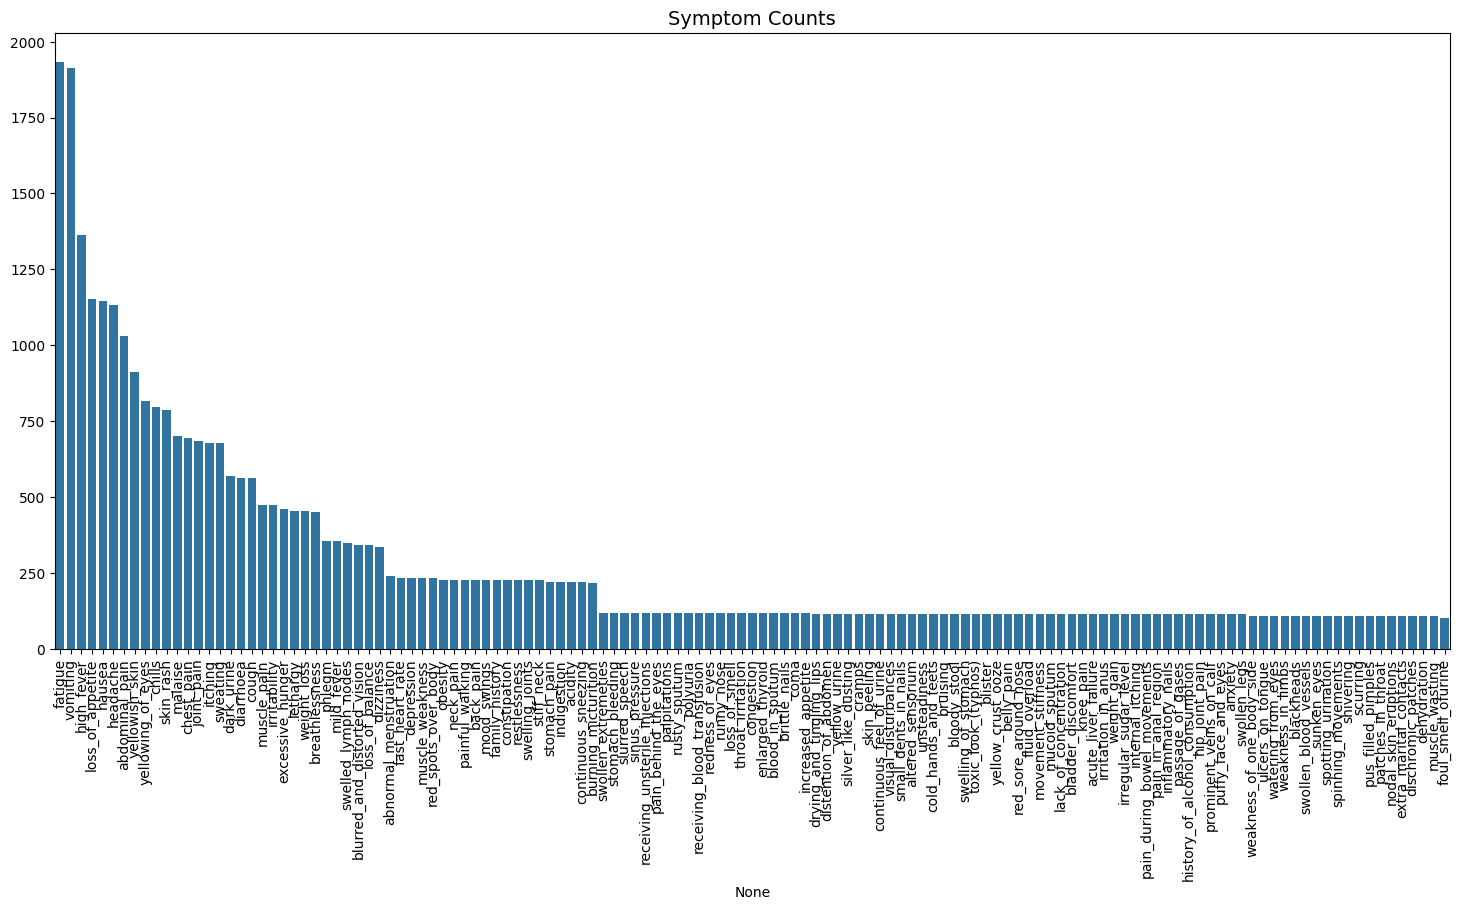

In [ ]:
# Assuming your data is in a DataFrame named 'data' and the symptoms are columns except 'Disease'
symptoms_data = df_onehot.drop('Disease', axis=1)

# Calculate the total count of each symptom
symptom_counts = symptoms_data.sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x=symptom_counts.index, y=symptom_counts.values)
plt.xticks(rotation=90)
plt.title('Symptom Counts', fontsize=14)
plt.show()




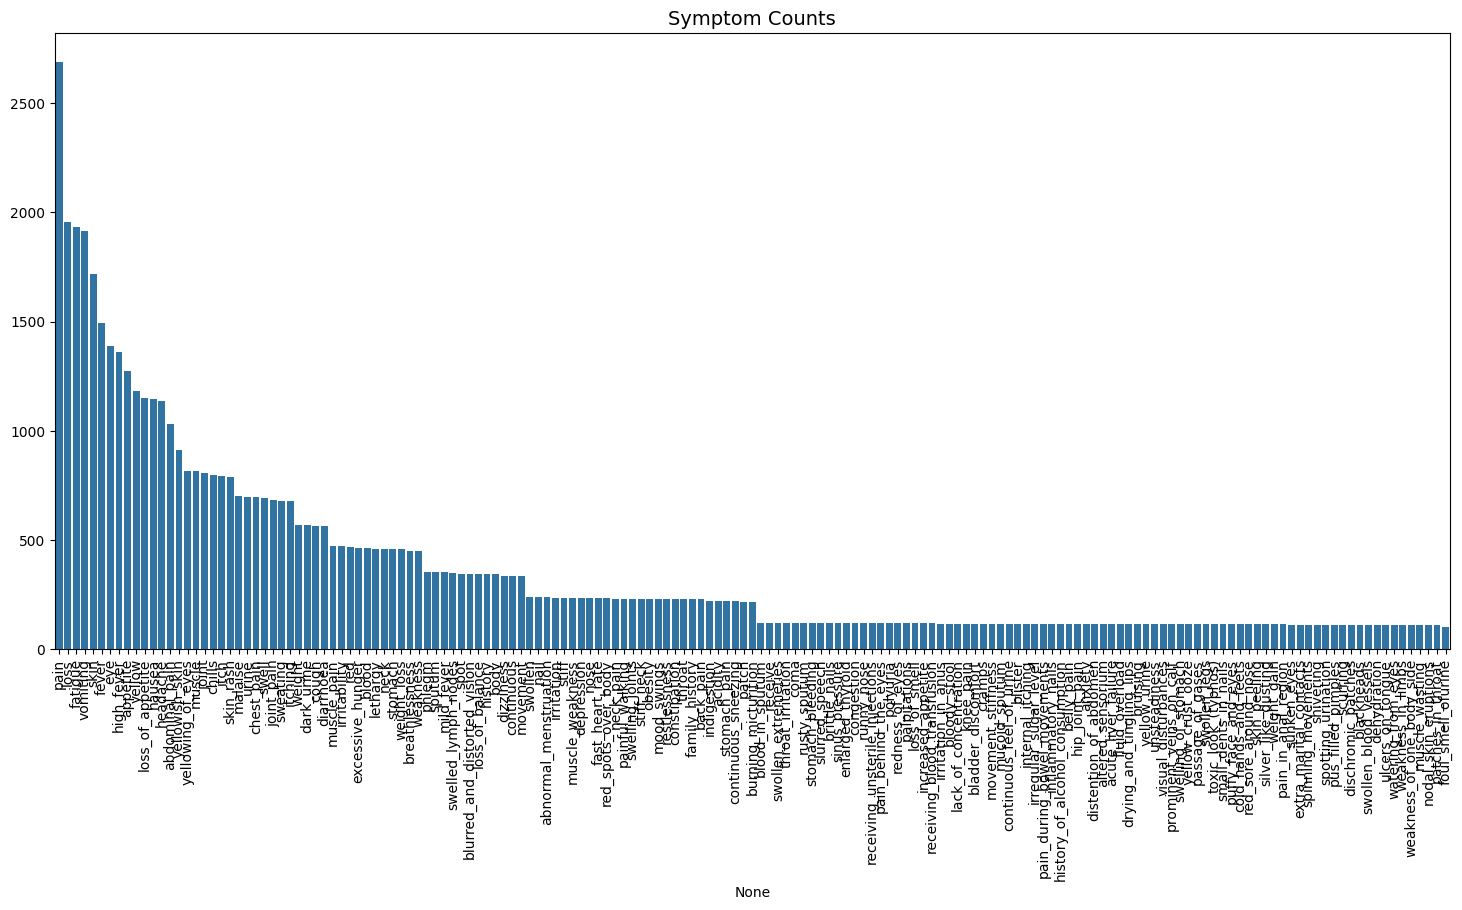

In [92]:
# new
import seaborn as sns

# Assuming your data is in a DataFrame named 'data' and the symptoms are columns except 'Disease'
symptoms_data = dataset_onehot.drop('Disease', axis=1)

# Calculate the total count of each symptom
symptom_counts = symptoms_data.sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x=symptom_counts.index, y=symptom_counts.values)
plt.xticks(rotation=90)
plt.title('Symptom Counts', fontsize=14)
plt.show()


## group by correlation

In [36]:
import pandas as pd

def dict_group_features(csv_path, threshold=0.8):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)

    # Create an empty dictionary to store the groups
    symptoms_tags = {}

    tc = 1

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        # Extract feature names and correlation from the row
        feature1, feature2, correlation = row['Feature 1'], row['Feature 2'], row['Correlation']



        # Check if the correlation is above the threshold
        if correlation >= threshold:
            # Check if feature1 is already in a group

            if feature1 in symptoms_tags:
                symptoms_tags[feature2]=symptoms_tags[feature1]
                
            elif feature2 in symptoms_tags:
                symptoms_tags[feature1]= symptoms_tags[feature2]

            else: 
                symptoms_tags[feature2]=f"sym{tc}"
                symptoms_tags[feature1]=f"sym{tc}"
                tc+=1

                
    return symptoms_tags,tc-1




In [37]:
symptoms_tags,num_group=dict_group_features("datasets/disease/high_corr.csv",0.9)

In [38]:
tags_symptoms={}
for k,v in symptoms_tags.items():
    if v not in tags_symptoms:
        tags_symptoms[v] = [k]
    else:
        tags_symptoms[v].append(k)

In [39]:
tags_symptoms

{'sym1': ['brittle_nails',
  'cold_hands_and_feets',
  'enlarged_thyroid',
  'puffy_face_and_eyes',
  'swollen_extremeties',
  'weight_gain'],
 'sym2': ['acute_liver_failure', 'coma', 'stomach_bleeding'],
 'sym3': ['bladder_discomfort', 'continuous_feel_of_urine'],
 'sym4': ['bruising',
  'cramps',
  'prominent_veins_on_calf',
  'swollen_blood_vessels',
  'swollen_legs'],
 'sym5': ['anxiety',
  'drying_and_tingling_lips',
  'palpitations',
  'slurred_speech'],
 'sym6': ['distention_of_abdomen',
  'fluid_overload',
  'history_of_alcohol_consumption',
  'swelling_of_stomach'],
 'sym7': ['increased_appetite', 'irregular_sugar_level', 'polyuria'],
 'sym8': ['bloody_stool',
  'irritation_in_anus',
  'pain_during_bowel_movements',
  'pain_in_anal_region'],
 'sym9': ['hip_joint_pain', 'knee_pain'],
 'sym10': ['congestion',
  'loss_of_smell',
  'redness_of_eyes',
  'runny_nose',
  'sinus_pressure',
  'throat_irritation'],
 'sym11': ['abnormal_menstruation', 'mood_swings'],
 'sym12': ['internal

In [13]:
df_onehot = pd.read_csv("datasets/disease/dataset_onehot.csv")

In [28]:
sym='cold_hands_and_feets'
disease="Hypothyroidism"


'brittle_nails',
  'cold_hands_and_feets',
  'enlarged_thyroid',
  'puffy_face_and_eyes',
  'swollen_extremeties',
  'weight_gain'

In [52]:
for k,v in tags_symptoms.items():
    print(k,"="*5)
    for sym in v:
        
        print(df_onehot[df_onehot[sym]==1]["Disease"].unique())

sym1 =====
['Hypothyroidism']
['Hypothyroidism']
['Hypothyroidism']
['Hypothyroidism']
['Hypothyroidism']
['Hypothyroidism']
sym2 =====
['Hepatitis E']
['Hepatitis E']
['Hepatitis E']
sym3 =====
['Urinary tract infection']
['Urinary tract infection']
sym4 =====
['Varicose veins']
['Varicose veins']
['Varicose veins']
['Varicose veins']
['Varicose veins']
sym5 =====
['Hypoglycemia']
['Hypoglycemia']
['Hypoglycemia']
['Hypoglycemia']
sym6 =====
['Alcoholic hepatitis']
['Alcoholic hepatitis']
['Alcoholic hepatitis']
['Alcoholic hepatitis']
sym7 =====
['Diabetes ']
['Diabetes ']
['Diabetes ']
sym8 =====
['Dimorphic hemmorhoids(piles)']
['Dimorphic hemmorhoids(piles)']
['Dimorphic hemmorhoids(piles)']
['Dimorphic hemmorhoids(piles)']
sym9 =====
['Osteoarthristis']
['Osteoarthristis']
sym10 =====
['Common Cold']
['Common Cold']
['Common Cold']
['Common Cold']
['Common Cold']
['Common Cold']
sym11 =====
['Hypothyroidism' 'Hyperthyroidism']
['Hypothyroidism' 'Hyperthyroidism']
sym12 =====
['Pe

In [14]:
(df_onehot[df_onehot["abnormal_menstruation"]==1]["abnormal_menstruation"]==1).sum()

240

In [15]:
(df_onehot[df_onehot["abnormal_menstruation"]==1]["enlarged_thyroid"]==1).sum()

120

In [56]:
df_onehot_new = pd.read_csv("datasets/disease/dataset_onehot_new_feature.csv")
df_onehot_new.head()

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,appetite,red,weight,stomach,loss,swell,muscle,neck,nail,blood
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
for key, symptoms in tags_symptoms.items():
    df_onehot_new[key] = df_onehot_new.apply(lambda row: 1 if any(row[symptom] == 1 for symptom in symptoms) else 0, axis=1)

In [58]:
df_onehot_new.head()

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,sym10,sym11,sym12,sym13,sym14,sym15,sym16,sym17,sym18,sym19
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df_onehot_new =df_onehot_new.drop(columns=list(symptoms_tags.keys()))

In [62]:
len(list(symptoms_tags.keys()))

61

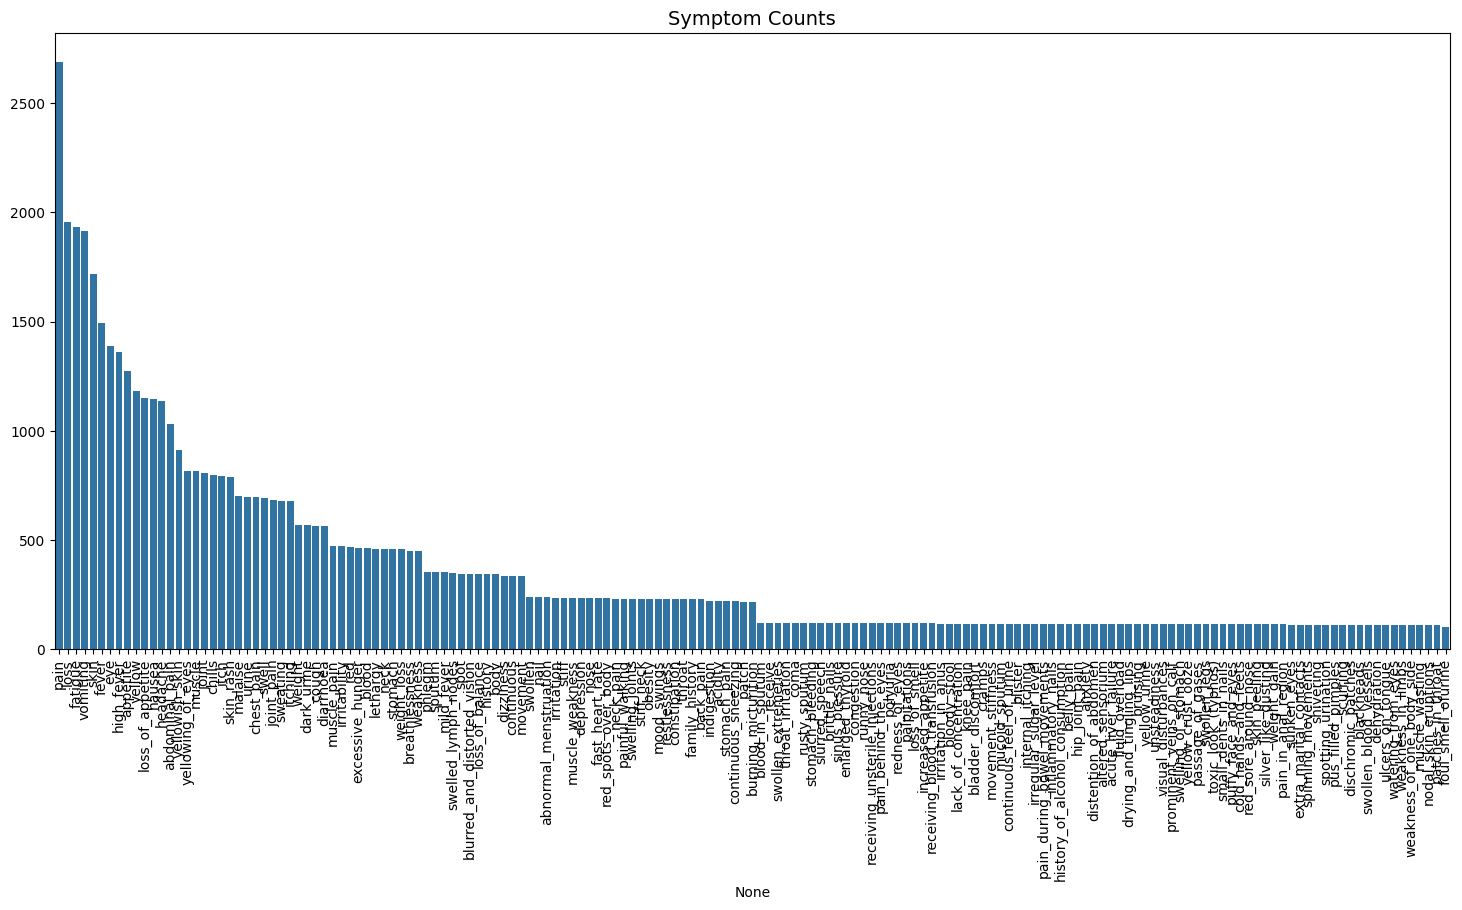

In [ ]:
# new
import seaborn as sns

# Assuming your data is in a DataFrame named 'data' and the symptoms are columns except 'Disease'
symptoms_data = dataset_onehot.drop('Disease', axis=1)

# Calculate the total count of each symptom
symptom_counts = symptoms_data.sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x=symptom_counts.index, y=symptom_counts.values)
plt.xticks(rotation=90)
plt.title('Symptom Counts', fontsize=14)
plt.show()


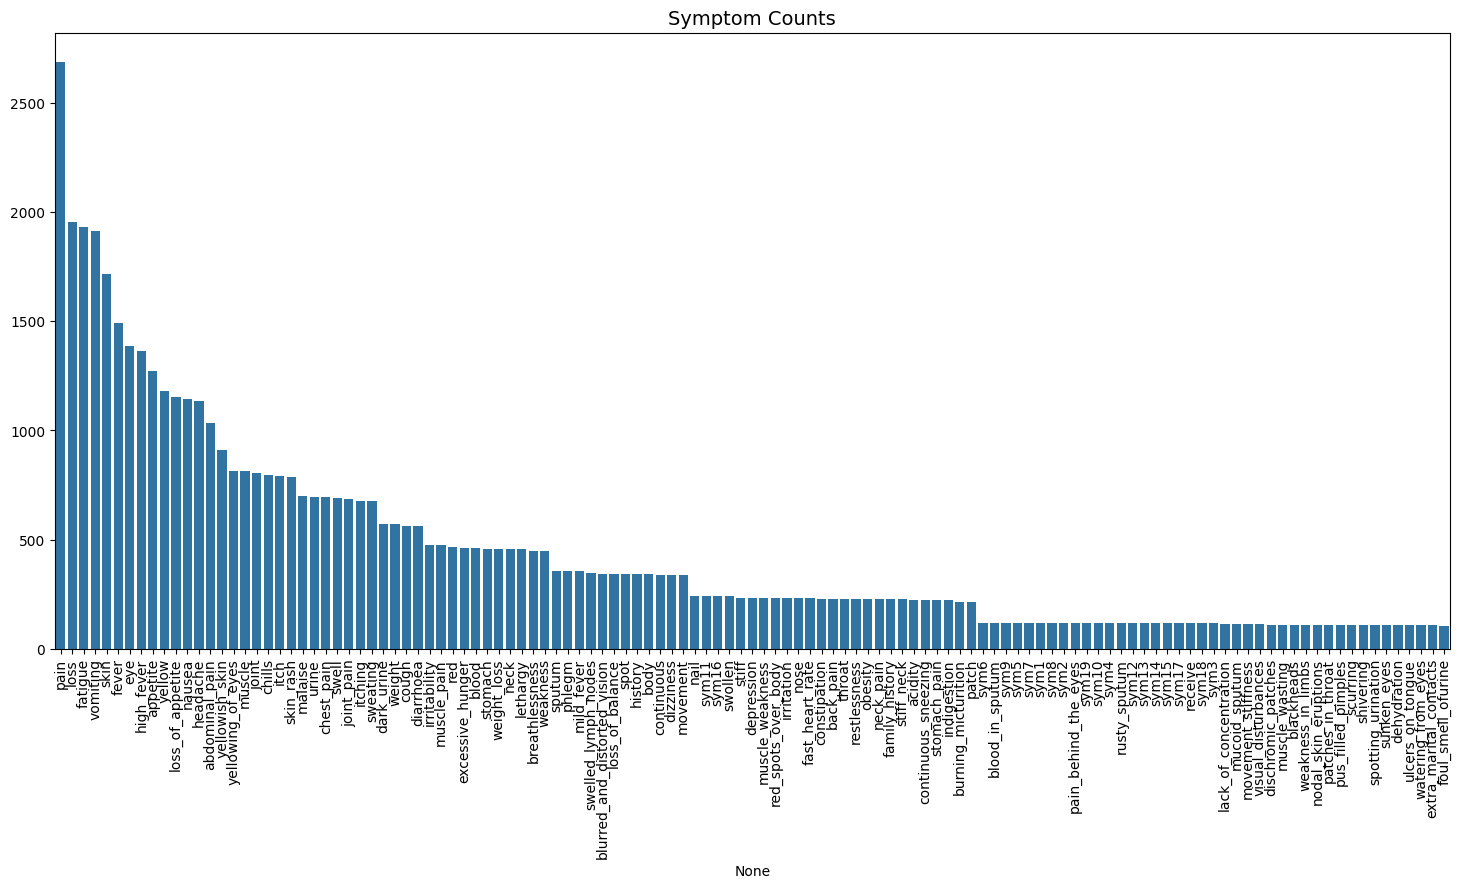

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'data' and the symptoms are columns except 'Disease'
symptoms_data = df_onehot_new.drop('Disease', axis=1)

# Calculate the total count of each symptom
symptom_counts = symptoms_data.sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(18, 8))
sns.barplot(x=symptom_counts.index, y=symptom_counts.values)
plt.xticks(rotation=90)
plt.title('Symptom Counts', fontsize=14)
plt.show()

In [75]:
df_onehot_new.to_csv("datasets/disease/dataset_onehot_final.csv",index=False)

In [89]:
import pandas as pd

# List of columns representing symptoms
symptom_columns = df_onehot_new.columns[1:] # Exclude the 'Disease'

# Create a new column 'Symptoms' by concatenating the symptoms for each row
df_onehot_new['Symptoms'] = df_onehot_new.apply(lambda row: ', '.join(symptom_columns[row[symptom_columns] == 1]), axis=1)

# Drop the one-hot encoded symptom columns
df_text_new = df_onehot_new.drop(symptom_columns, axis=1)

# Save the updated DataFrame to a new CSV file
df_text_new.to_csv("datasets/disease/dataset_words_final.csv", index=False)

df_onehot_new =  df_onehot_new.drop("Symptoms", axis=1)


In [93]:
df_text_new.head()

,Disease,Symptoms
0,Fungal infection,"dischromic_patches, itching, nodal_skin_erupti..."
1,Fungal infection,"dischromic_patches, nodal_skin_eruptions, skin..."
2,Fungal infection,"dischromic_patches, itching, nodal_skin_erupti..."
3,Fungal infection,"dischromic_patches, itching, skin_rash, skin, ..."
4,Fungal infection,"itching, nodal_skin_eruptions, skin_rash, skin..."


In [69]:
import pickle 

with open('datasets/disease/symptoms_tags.pkl', 'wb') as f:
    pickle.dump(symptoms_tags, f)


In [277]:
import pickle 

with open('datasets/disease/tags_symptoms.pkl', 'wb') as f:
    pickle.dump(tags_symptoms, f)


# split data

In [96]:
# for naive bayes
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_text_new['Symptoms'])
y = df_text_new['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [203]:
df_onehot = df_onehot_new

In [201]:
(df_onehot["malaise"]==1).sum()

702

In [205]:
df_onehot = pd.read_csv("datasets/disease/dataset_onehot_final.csv")

In [231]:
imp_feature = ['abdominal_pain', 'acidity', 'blood_in_sputum',
        'burning_micturition', 'chest_pain', 'chills', 'cough',
        'dark_urine', 'depression', 'diarrhoea', 'excessive_hunger',
        'fast_heart_rate', 'fatigue', 'headache', 'high_fever',
        'irritability', 'lack_of_concentration', 'loss_of_appetite',
        'muscle_pain', 'nausea', 'phlegm', 'scurring', 'stomach_pain',
        'sunken_eyes', 'sweating', 'visual_disturbances', 'vomiting',
        'yellowing_of_eyes', 'yellowish_skin', 'joint', 'sputum',
        'movement', 'stiff', 'skin', 'spot', 'itch', 'pain', 'yellow',
        'fever', 'weakness', 'patch', 'eye', 'appetite', 'weight',
        'stomach', 'muscle', 'neck', 'blood', 'sym3', 'sym4', 'sym5',
        'sym6', 'sym8', 'sym9', 'sym10', 'sym12', 'sym13', 'sym14',
        'sym15', 'sym16', 'sym17', 'sym18', 'sym19']

In [233]:
# for xg boost

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X = df_onehot[imp_feature]#X = df_onehot.drop(columns=['Disease',"loss","continuous","malaise"],axis=1)
y = df_onehot['Disease']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [107]:
drop_col = []
for k,v in filtered_group.items():
    drop_col +=v
    
drop_col=list(set(drop_col))

In [127]:


X = df_onehot.drop(drop_col+["Disease"],axis=1)
y = df_onehot['Disease']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# preprocess

## imputation

In [ ]:
# X_train.isna().sum() # check null value

In [ ]:
# y_train.value_counts() # check catagory value

## outlier

In [ ]:
# # see the outlier percentage
# def outlier_count(col, data = X_train):
    
#     # calculate your 25% quatile and 75% quatile
#     q75, q25 = np.percentile(data[col], [75, 25])
    
#     # calculate your inter quatile
#     iqr = q75 - q25
    
#     # min_val and max_val
#     min_val = q25 - (iqr*1.5)
#     max_val = q75 + (iqr*1.5)
    
#     # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
#     outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
#     # calculate the percentage of the outliers
#     outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
#     if(outlier_count > 0):
#         print("\n"+15*'-' + col + 15*'-'+"\n")
#         print('Number of outliers: {}'.format(outlier_count))
#         print('Percent of data that is outlier: {}%'.format(outlier_percent))

## scalling

no continuose data

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # feature scaling helps improve reach convergence faster
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)

# training

the algorithm should try   
-[x] multinomial naive bayes (baseline)  
-[X] random forrest (baseline)  
-[x] dicision tree   
-[x] gradient or xg boost   

## Onehot data model

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [235]:
# use x1
#any random_state you can use......up to you 
lr = LogisticRegression(random_state=96)
rf = RandomForestClassifier(random_state=96)
sv = SVC(random_state=96)
dt = DecisionTreeClassifier(random_state=96)

models = [lr, rf, sv,dt]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=96)

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv

Scores:  [1. 1. 1. 1. 1.] - Scores mean:  1.0 - Scores std (lower better):  0.0
Scores:  [1. 1. 1. 1. 1.] - Scores mean:  1.0 - Scores std (lower better):  0.0
Scores:  [1.         0.99491741 1.         1.         1.        ] - Scores mean:  0.9989834815756036 - Scores std (lower better):  0.002033036848792902
Scores:  [1.         0.99618806 1.         1.         1.        ] - Scores mean:  0.9992376111817027 - Scores std (lower better):  0.0015247776365946652


In [128]:

lr = LogisticRegression(random_state=96)
rf = RandomForestClassifier(random_state=96)
sv = SVC(random_state=96)
dt = DecisionTreeClassifier()

models = [lr, rf, sv,dt]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv

Scores:  [1. 1. 1. 1. 1.] - Scores mean:  1.0 - Scores std (lower better):  0.0
Scores:  [1. 1. 1. 1. 1.] - Scores mean:  1.0 - Scores std (lower better):  0.0
Scores:  [1. 1. 1. 1. 1.] - Scores mean:  1.0 - Scores std (lower better):  0.0
Scores:  [1.         1.         1.         1.         0.99364676] - Scores mean:  0.9987293519695044 - Scores std (lower better):  0.002541296060991094


In [ ]:
import xgboost

xg_classifier = xgboost.XGBClassifier()

In [ ]:
xg_classifier.fit(X_train, y_train,
                eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:0.42781
[1]	validation_0-mlogloss:0.33555


[2]	validation_0-mlogloss:0.26645
[3]	validation_0-mlogloss:0.21098
[4]	validation_0-mlogloss:0.16859
[5]	validation_0-mlogloss:0.13328
[6]	validation_0-mlogloss:0.10568
[7]	validation_0-mlogloss:0.08406
[8]	validation_0-mlogloss:0.06691


c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool 

[9]	validation_0-mlogloss:0.05385
[10]	validation_0-mlogloss:0.04372
[11]	validation_0-mlogloss:0.03586
[12]	validation_0-mlogloss:0.02964
[13]	validation_0-mlogloss:0.02483
[14]	validation_0-mlogloss:0.02104
[15]	validation_0-mlogloss:0.01800
[16]	validation_0-mlogloss:0.01553
[17]	validation_0-mlogloss:0.01359
[18]	validation_0-mlogloss:0.01196
[19]	validation_0-mlogloss:0.01079
[20]	validation_0-mlogloss:0.01008
[21]	validation_0-mlogloss:0.00966
[22]	validation_0-mlogloss:0.00934
[23]	validation_0-mlogloss:0.00916
[24]	validation_0-mlogloss:0.00902
[25]	validation_0-mlogloss:0.00892
[26]	validation_0-mlogloss:0.00888
[27]	validation_0-mlogloss:0.00884
[28]	validation_0-mlogloss:0.00881
[29]	validation_0-mlogloss:0.00878
[30]	validation_0-mlogloss:0.00876
[31]	validation_0-mlogloss:0.00874
[32]	validation_0-mlogloss:0.00871
[33]	validation_0-mlogloss:0.00869
[34]	validation_0-mlogloss:0.00867
[35]	validation_0-mlogloss:0.00865
[36]	validation_0-mlogloss:0.00864
[37]	validation_0-mlo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Get feature importance scores from the model
feature_importance = xg_classifier.feature_importances_

# Sort the features by importance (in descending order)
sorted_indices = np.argsort(feature_importance)[::-1]

In [ ]:

# symptom = np.zeros(131) ==> symptom[i] = 1  ==> xg_classifier.predict([symptom])
predict_disease = xg_classifier.predict(X_train.iloc[:2])
# xg_classifier.predict_proba(X_train.iloc[:2])
label_encoder.inverse_transform(predict_disease)

c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool 

array(['Cervical spondylosis', 'Hepatitis B'], dtype=object)

## word model

In [97]:
# use x1
#any random_state you can use......up to you 
mnb = MultinomialNB()
# lr = LogisticRegression(random_state=96)
# rf = RandomForestClassifier(random_state=96)
# sv = SVC(random_state=96)
# gnb = GaussianNB()

models = [mnb]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=96)


for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv

Scores:  [1. 1. 1. 1. 1.] - Scores mean:  1.0 - Scores std (lower better):  0.0


In [98]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [99]:
vectorizer.vocabulary_

{'dischromic_patches': 21,
 'itching': 38,
 'nodal_skin_eruptions': 59,
 'skin_rash': 76,
 'skin': 75,
 'itch': 37,
 'patch': 64,
 'chills': 12,
 'continuous_sneezing': 15,
 'shivering': 74,
 'watering_from_eyes': 113,
 'continuous': 14,
 'eye': 25,
 'acidity': 1,
 'chest_pain': 11,
 'cough': 16,
 'stomach_pain': 83,
 'ulcers_on_tongue': 109,
 'vomiting': 112,
 'pain': 62,
 'stomach': 82,
 'abdominal_pain': 0,
 'loss_of_appetite': 44,
 'nausea': 56,
 'yellowing_of_eyes': 119,
 'yellowish_skin': 120,
 'yellow': 118,
 'appetite': 2,
 'loss': 43,
 'burning_micturition': 10,
 'spotting_urination': 78,
 'spot': 77,
 'sym12': 92,
 'indigestion': 34,
 'extra_marital_contacts': 24,
 'high_fever': 32,
 'muscle_wasting': 53,
 'patches_in_throat': 65,
 'throat': 108,
 'fever': 29,
 'muscle': 51,
 'blurred_and_distorted_vision': 7,
 'excessive_hunger': 23,
 'fatigue': 28,
 'lethargy': 42,
 'obesity': 61,
 'restlessness': 71,
 'weight_loss': 117,
 'weight': 116,
 'sym7': 105,
 'dehydration': 18,
 '

In [100]:
mnb.n_features_in_

121

## Grid search

In [115]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ["gini","entropy"], 'max_depth': [10, 15, 20, 30, None],
              'max_features': [32,60,80,102,None],'min_samples_split':[2,25,50],'min_samples_leaf':[1,20,40]}

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [116]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 32,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [117]:
grid.best_score_

0.0

In [118]:
rf = grid.best_estimator_

rf.feature_importances_

array([0.016011  , 0.00171347, 0.00102069, 0.00154759, 0.00043096,
       0.00223902, 0.00377619, 0.00139675, 0.02382507, 0.00655517,
       0.00136283, 0.00158009, 0.00357581, 0.00347699, 0.00173942,
       0.00294037, 0.005857  , 0.00187593, 0.00247552, 0.00701512,
       0.00043984, 0.00227459, 0.00189593, 0.06279764, 0.00057232,
       0.02665191, 0.02133189, 0.00078196, 0.01679712, 0.00717808,
       0.00716625, 0.00195715, 0.00171405, 0.01668862, 0.00630077,
       0.01164476, 0.00335495, 0.00076592, 0.00143143, 0.00810339,
       0.00067481, 0.00194578, 0.01292144, 0.00275955, 0.00159671,
       0.00222054, 0.00076583, 0.00038857, 0.00183189, 0.00150873,
       0.00129836, 0.00124544, 0.00253499, 0.00110928, 0.00106581,
       0.01302601, 0.00068111, 0.00242269, 0.00377662, 0.00142609,
       0.00506562, 0.00146679, 0.00105612, 0.00039688, 0.04791018,
       0.00163992, 0.00063169, 0.004583  , 0.01069147, 0.00472227,
       0.01825154, 0.00475405, 0.00145733, 0.00594283, 0.00159

In [119]:
rf.feature_names_in_

array(['abdominal_pain', 'acidity', 'back_pain', 'blackheads',
       'blood_in_sputum', 'blurred_and_distorted_vision',
       'breathlessness', 'burning_micturition', 'chest_pain', 'chills',
       'constipation', 'continuous_sneezing', 'cough', 'dark_urine',
       'dehydration', 'depression', 'diarrhoea', 'dischromic_patches',
       'dizziness', 'excessive_hunger', 'extra_marital_contacts',
       'family_history', 'fast_heart_rate', 'fatigue',
       'foul_smell_ofurine', 'headache', 'high_fever', 'indigestion',
       'irritability', 'itching', 'joint_pain', 'lack_of_concentration',
       'lethargy', 'loss_of_appetite', 'loss_of_balance', 'malaise',
       'mild_fever', 'movement_stiffness', 'mucoid_sputum', 'muscle_pain',
       'muscle_wasting', 'muscle_weakness', 'nausea', 'neck_pain',
       'nodal_skin_eruptions', 'obesity', 'pain_behind_the_eyes',
       'patches_in_throat', 'phlegm', 'pus_filled_pimples',
       'red_spots_over_body', 'restlessness', 'rusty_sputum', 'scu

In [236]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ["gini","entropy"], 'max_depth': [10,12,13,14, 15, 20],
              'max_features': [32,60,80,102,None],'min_samples_split':[2],'min_samples_leaf':[1]}

dt = DecisionTreeClassifier(random_state = 96)

grid = GridSearchCV(estimator = dt, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [237]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 60,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [238]:
grid.best_score_

0.0

In [239]:
dt = grid.best_estimator_

In [240]:
dt.tree_.node_count

171

In [243]:
dt.feature_importances_,dt.feature_names_in_

(array([0.06228343, 0.00164043, 0.        , 0.        , 0.02947404,
        0.00128349, 0.00569457, 0.00204345, 0.00839193, 0.00218123,
        0.00270673, 0.        , 0.15936205, 0.03064553, 0.00084962,
        0.03286424, 0.00773132, 0.00144798, 0.00114899, 0.00220451,
        0.        , 0.        , 0.02487309, 0.00847303, 0.00072418,
        0.        , 0.00484779, 0.01708416, 0.        , 0.0456917 ,
        0.00234406, 0.        , 0.        , 0.04262624, 0.00952232,
        0.00672519, 0.17075043, 0.05391267, 0.03634872, 0.        ,
        0.00874985, 0.03431356, 0.01777793, 0.00202984, 0.01310896,
        0.01364269, 0.00270182, 0.02083403, 0.012373  , 0.00042299,
        0.01174812, 0.00172524, 0.009105  , 0.00871372, 0.        ,
        0.00895386, 0.        , 0.01281379, 0.00113759, 0.01253343,
        0.009105  , 0.01218621, 0.01014626]),
 array(['abdominal_pain', 'acidity', 'blood_in_sputum',
        'burning_micturition', 'chest_pain', 'chills', 'cough',
        'dark_urin

In [216]:
import numpy as np
importance_feature = dt.feature_names_in_[np.where(dt.feature_importances_ > 0)[0]]

In [200]:
np.where(importance_feature=="loss")

(array([46], dtype=int64),)

In [242]:
importance_feature,len(importance_feature)

(array(['abdominal_pain', 'acidity', 'blood_in_sputum',
        'burning_micturition', 'chest_pain', 'chills', 'cough',
        'dark_urine', 'depression', 'diarrhoea', 'excessive_hunger',
        'fast_heart_rate', 'fatigue', 'headache', 'high_fever',
        'irritability', 'lack_of_concentration', 'loss_of_appetite',
        'muscle_pain', 'nausea', 'phlegm', 'scurring', 'stomach_pain',
        'sunken_eyes', 'sweating', 'visual_disturbances', 'vomiting',
        'yellowing_of_eyes', 'yellowish_skin', 'joint', 'sputum',
        'movement', 'stiff', 'skin', 'spot', 'itch', 'pain', 'yellow',
        'fever', 'weakness', 'patch', 'eye', 'appetite', 'weight',
        'stomach', 'muscle', 'neck', 'blood', 'sym3', 'sym4', 'sym5',
        'sym6', 'sym8', 'sym9', 'sym10', 'sym12', 'sym13', 'sym14',
        'sym15', 'sym16', 'sym17', 'sym18', 'sym19'], dtype=object),
 63)

In [244]:
dt = DecisionTreeClassifier(random_state = 96,**grid.best_params_)

In [245]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features=60,
                       random_state=96)

In [246]:
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming 'dt' is your decision tree model
plt.figure(figsize=(160,60))  # Adjust the figure size as needed
tree.plot_tree(dt)
plt.savefig('figure/decision_tree3.png')

# Test

xg boost

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,xg_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        24
          17       1.00    

c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool 

naive bayes

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,mnb.predict(X_test)))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        24
                           

Random_forrest

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        24
          17       1.00    

Decision tree

In [247]:
from sklearn.metrics import classification_report

print(classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        24
          17       1.00    

## save

In [ ]:
import pickle
import os

name = "Xg_boost"

# save the model to disk
model_path = f"models/{name}/"

if not os.path.exists(model_path):
    os.makedirs(model_path,exist_ok=True)

filename = model_path + 'disease_predictor.pkl'
preprocess_name = model_path + 'label_encoder.pkl'
pickle.dump(xg_classifier, open(filename, 'wb'))
pickle.dump(label_encoder, open(preprocess_name, 'wb'))

In [249]:
import pickle
import os

name = "Decision_tree3"

# save the model to disk
model_path = f"models/{name}/"

if not os.path.exists(model_path):
    os.makedirs(model_path,exist_ok=True)

filename = model_path + 'disease_predictor.pkl'
preprocess_name = model_path + 'label_encoder.pkl'
pickle.dump(dt, open(filename, 'wb'))
pickle.dump(label_encoder, open(preprocess_name, 'wb'))


In [101]:
import pickle
import os

name = "MultinomialNB_final_datasets"

# save the model to disk
model_path = f"models/{name}/"

if not os.path.exists(model_path):
    os.makedirs(model_path,exist_ok=True)

filename = model_path + 'disease_predictor.pkl'
preprocess_name = model_path + 'vectorizer.pkl'
pickle.dump(mnb, open(filename, 'wb'))
pickle.dump(vectorizer, open(preprocess_name, 'wb'))


## load

In [ ]:
import pickle
import os

mnb = pickle.load(open("models/MultinomialNB/disease_predictor.pkl", 'rb'))
vectorizer = pickle.load(open("models/MultinomialNB/vectorizer.pkl",'rb')) 

# Inference

## naive bayes

In [43]:
# Assuming 'clf' is your trained model and 'vectorizer' is your CountVectorizer
# Define new symptoms
new_symptoms = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic_patches', '', '', '', '', '', '', '', '', '', '', '', '', '']

# Preprocess the new symptoms
new_symptoms_str = ' '.join(new_symptoms)
new_symptoms_vectorized = vectorizer.transform([new_symptoms_str])

# Make predictions
predicted_disease = mnb.predict(new_symptoms_vectorized)

print(f'Predicted Disease: {predicted_disease[0]}')

Predicted Disease: Fungal infection


In [44]:
class_probabilities = mnb.predict_proba(new_symptoms_vectorized)
class_probabilities

array([[4.31563038e-09, 1.63054647e-08, 1.50388892e-06, 2.42702611e-09,
        1.72880852e-08, 7.26295389e-09, 4.26463383e-09, 7.83081707e-09,
        4.44357912e-06, 2.30427910e-07, 9.87066429e-11, 1.88341041e-08,
        7.10413974e-10, 7.26295389e-09, 6.68981749e-05, 9.99925449e-01,
        4.61015467e-09, 1.61708486e-08, 1.67178060e-08, 3.33772706e-08,
        4.21438832e-09, 1.06696391e-09, 2.68925631e-10, 8.22123796e-09,
        5.04941678e-10, 3.66305912e-10, 2.72148674e-10, 7.25433835e-07,
        1.46409387e-07, 1.59401451e-09, 1.05805403e-09, 4.16488063e-09,
        1.63054647e-08, 4.29003739e-09, 5.03187649e-10, 3.83169018e-07,
        1.24062554e-10, 3.66305912e-10, 1.60376188e-08, 2.59670839e-09,
        5.01441229e-10]])

In [ ]:
np.where(class_probabilities[0])[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int64)

In [ ]:
class_probabilities[0].argmax()

15

In [ ]:
mnb.classes_,class_probabilities[0][15],mnb.classes_[15]

(array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
        'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
        'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
        'Common Cold', 'Dengue', 'Diabetes ',
        'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
        'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
        'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
        'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
        'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
        'Osteoarthristis', 'Paralysis (brain hemorrhage)',
        'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
        'Typhoid', 'Urinary tract infection', 'Varicose veins',
        'hepatitis A'], dtype='<U39'),
 0.99992544898337,
 'Fungal infection')

In [ ]:
class_probabilities.sum()

1.0000000000000009

In [49]:
mnb.feature_log_prob_

array([[-6.51025834, -6.51025834, -6.51025834, ..., -6.51025834,
        -6.51025834, -6.51025834],
       [-6.17794411, -6.17794411, -6.17794411, ..., -6.17794411,
        -6.17794411, -6.17794411],
       [-6.18001665, -6.18001665, -6.18001665, ..., -6.18001665,
        -6.18001665, -6.18001665],
       ...,
       [-6.18208491, -6.18208491, -6.18208491, ..., -6.18208491,
        -6.18208491, -6.18208491],
       [-6.63725803, -6.63725803, -6.63725803, ..., -6.63725803,
        -6.63725803, -6.63725803],
       [-2.50509163, -7.04838641, -7.04838641, ..., -7.04838641,
        -2.47367543, -2.5375269 ]])

In [50]:
mnb.feature_log_prob_.shape

(41, 132)

In [58]:
vectorizer.get_feature_names_out()

array(['abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain',
       'belly_pain', 'blackheads', 'bladder_discomfort', 'blister',
       'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision',
       'breathlessness', 'brittle_nails', 'bruising',
       'burning_micturition', 'chest_pain', 'chills',
       'cold_hands_and_feets', 'coma', 'congestion', 'constipation',
       'continuous_feel_of_urine', 'continuous_sneezing', 'cough',
       'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea',
       'dischromic_patches', 'distention_of_abdomen', 'dizziness',
       'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger',
       'extra_marital_contacts', 'family_history', 'fast_heart_rate',
       'fatigue', 'fluid_overload', 'foul_smell_ofurine', 'headache',
       'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption',
       'increased_appetite', 'indigestion', 'infla

## random forrest

In [250]:
import pickle
import os

clf = pickle.load(open("models/Decision_tree3/disease_predictor.pkl", 'rb'))
label_encoder = pickle.load(open("models/Decision_tree3/label_encoder.pkl",'rb')) 

In [258]:
children_left

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  -1,
        -1,  15,  -1,  -1,  -1,  19,  20,  -1,  -1,  -1,  24,  25,  26,
        27,  -1,  -1,  -1,  -1,  -1,  33,  34,  -1,  -1,  -1,  -1,  39,
        40,  -1,  -1,  -1,  44,  45,  46,  47,  -1,  49,  -1,  -1,  -1,
        -1,  -1,  55,  56,  57,  58,  59,  -1,  -1,  62,  -1,  -1,  65,
        66,  -1,  -1,  69,  -1,  -1,  -1,  -1,  74,  75,  76,  77,  78,
        79,  -1,  -1,  82,  -1,  -1,  85,  86,  87,  -1,  -1,  90,  91,
        -1,  -1,  94,  -1,  -1,  -1,  98,  99,  -1,  -1,  -1, 103, 104,
        -1, 106,  -1,  -1, 109,  -1,  -1, 112, 113, 114, 115,  -1,  -1,
        -1,  -1, 120, 121,  -1, 123,  -1,  -1, 126,  -1,  -1, 129, 130,
       131, 132, 133, 134,  -1,  -1,  -1, 138,  -1,  -1, 141, 142,  -1,
        -1,  -1, 146, 147,  -1,  -1,  -1, 151, 152, 153, 154,  -1,  -1,
        -1, 158,  -1,  -1, 161, 162, 163, 164,  -1,  -1,  -1,  -1, 169,
        -1,  -1], dtype=int64)

In [259]:
children_right

array([128,  73,  54,  43,  38,  37,  32,  23,  18,  17,  14,  13,  -1,
        -1,  16,  -1,  -1,  -1,  22,  21,  -1,  -1,  -1,  31,  30,  29,
        28,  -1,  -1,  -1,  -1,  -1,  36,  35,  -1,  -1,  -1,  -1,  42,
        41,  -1,  -1,  -1,  53,  52,  51,  48,  -1,  50,  -1,  -1,  -1,
        -1,  -1,  72,  71,  64,  61,  60,  -1,  -1,  63,  -1,  -1,  68,
        67,  -1,  -1,  70,  -1,  -1,  -1,  -1, 111, 102,  97,  84,  81,
        80,  -1,  -1,  83,  -1,  -1,  96,  89,  88,  -1,  -1,  93,  92,
        -1,  -1,  95,  -1,  -1,  -1, 101, 100,  -1,  -1,  -1, 108, 105,
        -1, 107,  -1,  -1, 110,  -1,  -1, 119, 118, 117, 116,  -1,  -1,
        -1,  -1, 125, 122,  -1, 124,  -1,  -1, 127,  -1,  -1, 150, 145,
       140, 137, 136, 135,  -1,  -1,  -1, 139,  -1,  -1, 144, 143,  -1,
        -1,  -1, 149, 148,  -1,  -1,  -1, 160, 157, 156, 155,  -1,  -1,
        -1, 159,  -1,  -1, 168, 167, 166, 165,  -1,  -1,  -1,  -1, 170,
        -1,  -1], dtype=int64)

In [262]:
clf.tree_.n_node_samples

array([3936, 2385, 1054,  745,  461,  282,  186,   78,   43,   28,   17,
          9,    4,    5,    8,    4,    4,   11,   15,    9,    4,    5,
          6,   35,   24,   16,   10,    5,    5,    6,    8,   11,  108,
         97,   92,    5,   11,   96,  179,   94,   85,    9,   85,  284,
        193,  105,   17,    9,    8,    3,    5,   88,   88,   91,  309,
        218,  129,  105,   96,   92,    4,    9,    4,    5,   24,   12,
          7,    5,   12,    8,    4,   89,   91, 1331,  947,  664,  486,
        292,  192,   96,   96,  100,    4,   96,  194,  112,   95,   90,
          5,   17,    8,    2,    6,    9,    4,    5,   82,  178,   93,
         88,    5,   85,  283,   99,   92,    7,    4,    3,  184,   88,
         96,  384,  189,   98,    7,    4,    3,   91,   91,  195,   96,
         87,    9,    3,    6,   99,   93,    6, 1551,  731,  463,  286,
        189,   97,   91,    6,   92,   97,   92,    5,  177,   85,   79,
          6,   92,  268,  177,   90,   87,   91,  8

In [267]:
label_encoder.inverse_transform([1])

array(['AIDS'], dtype=object)

In [274]:
clf.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [279]:
import random
random.choice([1,2,3])

2

In [287]:
random.choice([1,2,3])

1

In [290]:
"symdfs"[:3] == "sym"

True

In [275]:
def tags2feature(sym,tags_symptoms):
    list_feature = tags_symptoms[sym]
    return random.choice(list_feature)

current_node = 0  # Start at the root node (node 0)
while True:
    
    feature = clf.tree_.feature[current_node]
    threshold = clf.tree_.threshold[current_node]
    
    if feature == -2:  # Reached a leaf node
        predicted_value = clf.tree_.value[current_node]
        final_prediction = label_encoder.inverse_transform([predicted_value.argmax()])[0]

        print(f"Reached leaf node. Predicted class: {final_prediction}")
        break
    

    # Ask for user input to simulate the feature value
    feature_value = float(input(f"Enter value for feature {feature}"))
    
    # Check the condition based on the user input and the threshold
    if feature_value <= threshold:
        next_node = clf.tree_.children_left[current_node]
        print(f"At Node {current_node}: Feature {clf.feature_names_in_[feature]} No. Move to Node {next_node}")
    else:
        next_node = clf.tree_.children_right[current_node]
        print(f"At Node {current_node}: Feature {clf.feature_names_in_[feature]} Yes. Move to Node {next_node}")
    
    current_node = next_node  # Move to the next node based on the condition



At Node 0: Feature fatigue No. Move to Node 1
At Node 1: Feature pain Yes. Move to Node 73
At Node 73: Feature abdominal_pain Yes. Move to Node 111
At Node 111: Feature yellowing_of_eyes Yes. Move to Node 119
At Node 119: Feature fever Yes. Move to Node 125
At Node 125: Feature stomach Yes. Move to Node 127
Reached leaf node. Predicted class: Hepatitis E


In [ ]:
# Check the condition based on the user input and the threshold
if feature_value <= threshold:
    next_node = clf.tree_.children_left[current_node]

else:
    next_node = clf.tree_.children_right[current_node]


current_node = next_node  # Move to the next node based on the condition